In [16]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk


In [13]:
df=pd.read_csv('Reviews.csv')
print(df.shape)
df=df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [14]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


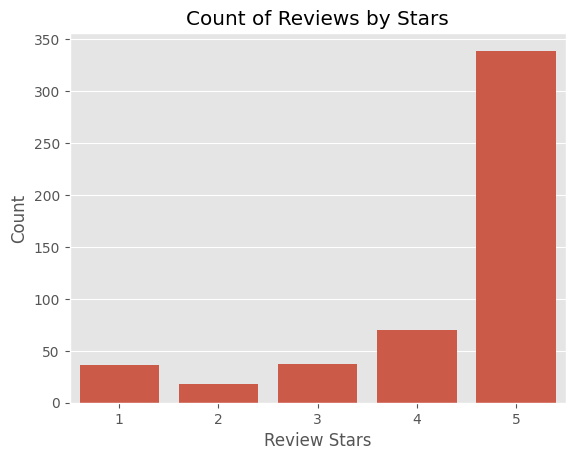

In [21]:
sns.countplot(data=df, x='Score')
plt.title('Count of Reviews by Stars')
plt.xlabel('Review Stars')
plt.ylabel('Count')
plt.show()

In [15]:
ex=df['Text'][37]
print(ex)

What else do you need to know? Oatmeal, instant (make it with a half cup of low-fat milk and add raisins;nuke for 90 seconds). More expensive than Kroger store brand oatmeal and maybe a little tastier or better texture or something. It's still just oatmeal. Mmm, convenient!


In [16]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(ex)
print(tokens[:10])

['What', 'else', 'do', 'you', 'need', 'to', 'know', '?', 'Oatmeal', ',']


In [17]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('What', 'WP'),
 ('else', 'RB'),
 ('do', 'VBP'),
 ('you', 'PRP'),
 ('need', 'VB'),
 ('to', 'TO'),
 ('know', 'VB'),
 ('?', '.'),
 ('Oatmeal', 'NNP'),
 (',', ',')]

In [18]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  What/WP
  else/RB
  do/VBP
  you/PRP
  need/VB
  to/TO
  know/VB
  ?/.
  (PERSON Oatmeal/NNP)
  ,/,
  instant/NN
  (/(
  make/VB
  it/PRP
  with/IN
  a/DT
  half/JJ
  cup/NN
  of/IN
  low-fat/JJ
  milk/NN
  and/CC
  add/JJ
  raisins/NNS
  ;/:
  nuke/NNS
  for/IN
  90/CD
  seconds/NNS
  )/)
  ./.
  More/RBR
  expensive/JJ
  than/IN
  (PERSON Kroger/NNP)
  store/NN
  brand/NN
  oatmeal/NN
  and/CC
  maybe/RB
  a/DT
  little/JJ
  tastier/NN
  or/CC
  better/JJR
  texture/NN
  or/CC
  something/NN
  ./.
  It/PRP
  's/VBZ
  still/RB
  just/RB
  oatmeal/VB
  ./.
  (PERSON Mmm/NNP)
  ,/,
  convenient/NN
  !/.)


In [19]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\DC\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\DC\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [20]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [9]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [10]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [22]:
sia.polarity_scores(ex)

{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.4457}

In [23]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [24]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [25]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


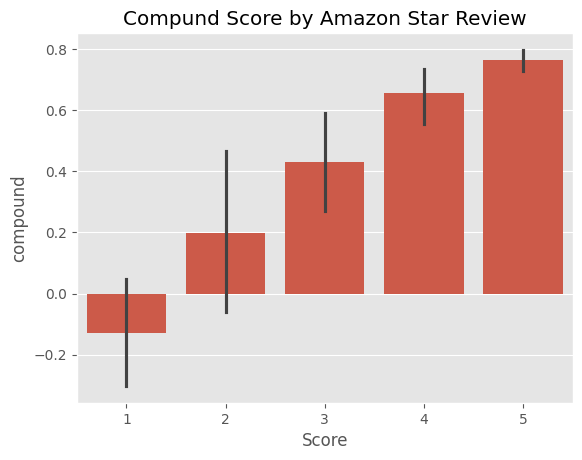

In [40]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

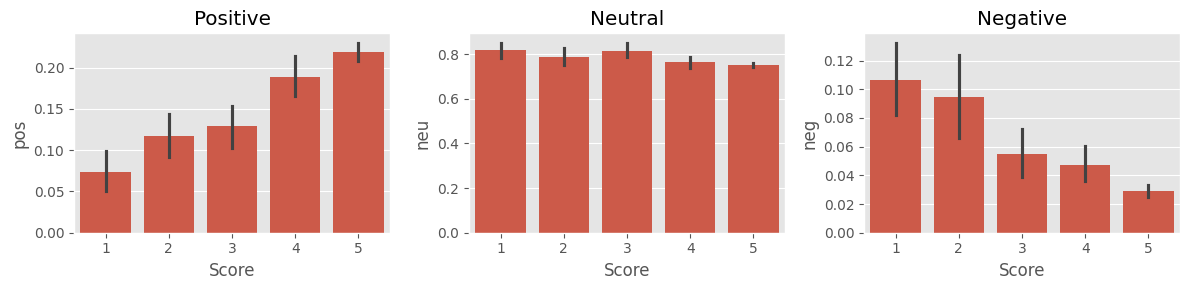

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
%pip install torch torchvision torchaudio


In [42]:
def get_true_label(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

df['true_label'] = df['Score'].apply(get_true_label)


In [37]:
analyzer = SentimentIntensityAnalyzer()
def get_vader_scores(text):
    return analyzer.polarity_scores(text)

df = pd.read_csv('Reviews.csv')
vader_scores = df['Text'].apply(get_vader_scores)
vader_df = pd.DataFrame(vader_scores.tolist())
df = pd.concat([df.reset_index(drop=True), vader_df.reset_index(drop=True)], axis=1)


In [40]:
def get_vader_label(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['predicted_label'] = df['compound'].apply(get_vader_label)


In [43]:
from sklearn.metrics import classification_report
print(classification_report(df['true_label'], df['predicted_label']))


              precision    recall  f1-score   support

    negative       0.56      0.40      0.47     82037
     neutral       0.13      0.04      0.06     42640
    positive       0.84      0.94      0.89    443777

    accuracy                           0.80    568454
   macro avg       0.51      0.46      0.47    568454
weighted avg       0.75      0.80      0.77    568454



In [5]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [6]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [27]:
print(ex)
sia.polarity_scores(ex)

What else do you need to know? Oatmeal, instant (make it with a half cup of low-fat milk and add raisins;nuke for 90 seconds). More expensive than Kroger store brand oatmeal and maybe a little tastier or better texture or something. It's still just oatmeal. Mmm, convenient!


{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.4457}

In [28]:
encoded_text = tokenizer(ex, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.038969066, 'roberta_neu': 0.22200036, 'roberta_pos': 0.7390306}


In [29]:
def polarity_scores_roberta(ex):
    encoded_text = tokenizer(ex, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [30]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [31]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [20]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

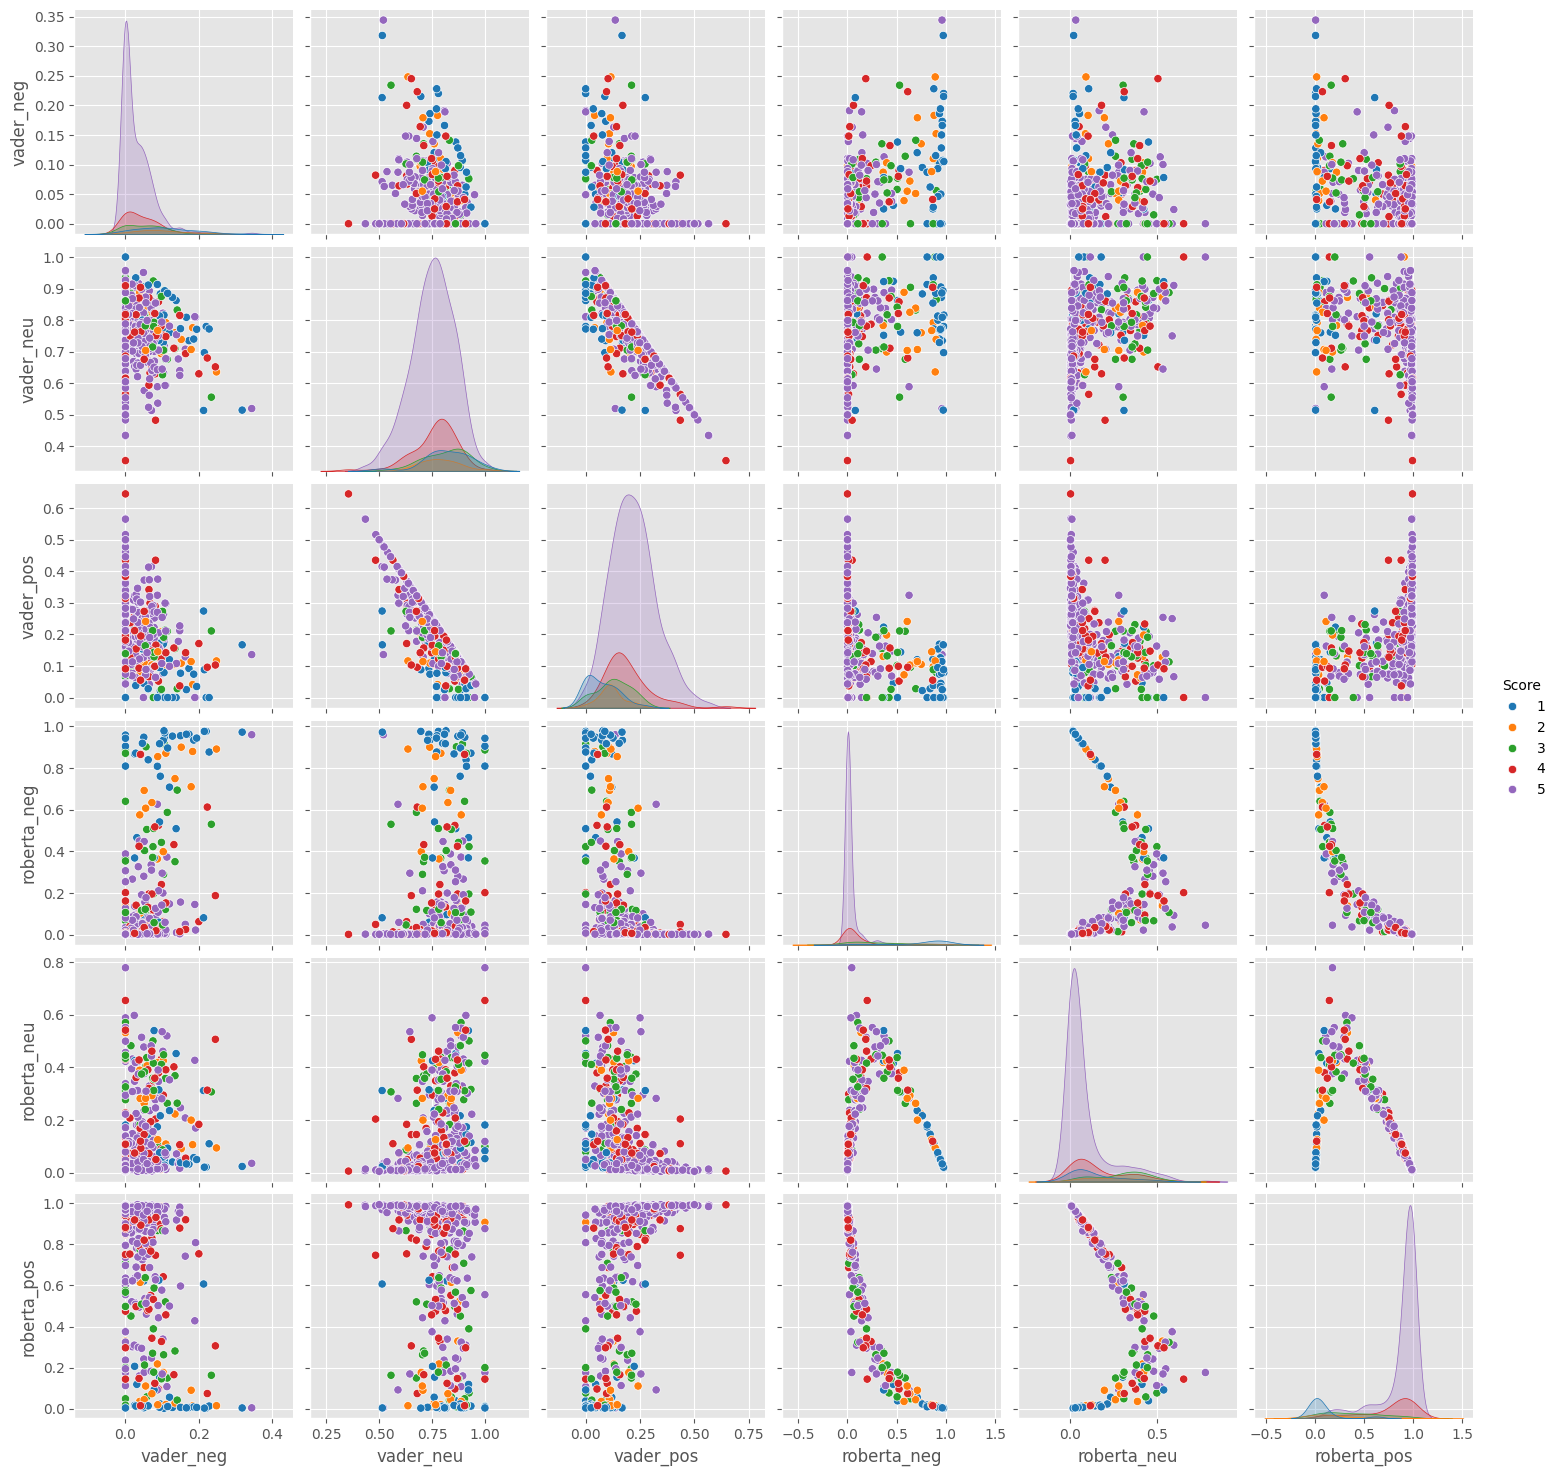

In [21]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [22]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [23]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [24]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [25]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [2]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [27]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [3]:
sent_pipeline('it was beutifully disgusting')

[{'label': 'NEGATIVE', 'score': 0.9989027976989746}]

In [44]:
from transformers import pipeline
import gradio as gr
sent_pipeline = pipeline("sentiment-analysis")
def analyze_sentiment(text):
    result = sent_pipeline(text)[0]
    label = result['label']
    score = round(result['score'], 4)
    return f"Sentiment: {label} (Confidence: {score})"
interface = gr.Interface(
    fn=analyze_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="Enter your review or sentence here..."),
    outputs="text",
    title="Sentiment Analysis",
    description="Enter a sentence or review to get its sentiment using HuggingFace Transformers."
)
interface.launch(share=True)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


* Running on local URL:  http://127.0.0.1:7862

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
